In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!unzip -uq "/content/gdrive/My Drive/Galaxy_Zoo/data.zip" -d '/content/'

In [0]:
!unzip -uq "/content/gdrive/My Drive/Galaxy_Zoo/testing.zip" -d '/content/'

In [17]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.1.0rc1:
  Would remove:
    /tensorflow-2.1.0/python3.6/tensorflow-2.1.0rc1.dist-info/*
    /tensorflow-2.1.0/python3.6/tensorflow/*
    /tensorflow-2.1.0/python3.6/tensorflow_core/*
Proceed (y/n)? n


In [19]:
!pip install tensorflow==2.1.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.1.0 (from versions: 0.12.1, 1.0.0, 1.0.1, 1.1.0rc0, 1.1.0rc1, 1.1.0rc2, 1.1.0, 1.2.0rc0, 1.2.0rc1, 1.2.0rc2, 1.2.0, 1.2.1, 1.3.0rc0, 1.3.0rc1, 1.3.0rc2, 1.3.0, 1.4.0rc0, 1.4.0rc1, 1.4.0, 1.4.1, 1.5.0rc0, 1.5.0rc1, 1.5.0, 1.5.1, 1.6.0rc0, 1.6.0rc1, 1.6.0, 1.7.0rc0, 1.7.0rc1, 1.7.0, 1.7.1, 1.8.0rc0, 1.8.0rc1, 1.8.0, 1.9.0rc0, 1.9.0rc1, 1.9.0rc2, 1.9.0, 1.10.0rc0, 1.10.0rc1, 1.10.0, 1.10.1, 1.11.0rc0, 1.11.0rc1, 1.11.0rc2, 1.11.0, 1.12.0rc0, 1.12.0rc1, 1.12.0rc2, 1.12.0, 1.12.2, 1.12.3, 1.13.0rc0, 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2)
ERROR: No matching distribution found for tensorflow==2.1.0


In [28]:
!pip show tensorflow

Name: tensorflow
Version: 2.1.0rc1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /tensorflow-2.1.0/python3.6
Requires: opt-einsum, absl-py, tensorboard, gast, numpy, protobuf, six, keras-applications, grpcio, keras-preprocessing, wrapt, google-pasta, termcolor, tensorflow-estimator, wheel, astor
Required-by: stable-baselines, magenta, fancyimpute


In [29]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [30]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8192723923874593206
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7851785073575183512
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10175757891323703477
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15956161332
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15449561568431758594
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [0]:
import pandas as pd
import os, random, shutil

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#DIR = '/content/gdrive/My Drive/Galaxy_Zoo/'
DIR = '/content/'

train_dir = DIR + 'data/train'
validation_dir = DIR + 'data/validation'

In [0]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)
validation_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [34]:
train_datagen

In [35]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='categorical')
validation_generator = train_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150,150),
                                                         batch_size=32,                                      
                                                         class_mode='categorical')

Found 8044 images belonging to 3 classes.
Found 3450 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    # first convolution layer, input is an 150x150 image x3 colors
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # third convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the image pixels
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron fully connected hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [40]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=8044/32,
                             epochs = 10,
                             validation_data = validation_generator,
                             validation_steps= 3450/32,
                             verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 251.375 steps, validate for 107.8125 steps
Epoch 1/10
252/251 [==============================] - 32s 126ms/step - loss: 0.6984 - accuracy: 0.6160 - val_loss: 0.5436 - val_accuracy: 0.7255
Epoch 2/10
252/251 [==============================] - 31s 122ms/step - loss: 0.5327 - accuracy: 0.7287 - val_loss: 0.5188 - val_accuracy: 0.7412
Epoch 3/10
252/251 [==============================] - 31s 121ms/step - loss: 0.4621 - accuracy: 0.7730 - val_loss: 0.4013 - val_accuracy: 0.8316
Epoch 4/10
252/251 [==============================] - 31s 122ms/step - loss: 0.4124 - accuracy: 0.8083 - val_loss: 0.3907 - val_accuracy: 0.8220
Epoch 5/10
252/251 [==============================] - 31s 121ms/step - loss: 0.3754 - accuracy: 0.8301 - val_loss: 0.3932 - val_accuracy: 0.8339
Epoch 6/10
252/251 [==============================] - 31s 121ms/step - loss: 0.3437 - accuracy: 0.8476 - val_loss: 0.3927 - val_accuracy: 0.8154
Epoch 7/10
252/251 [=======

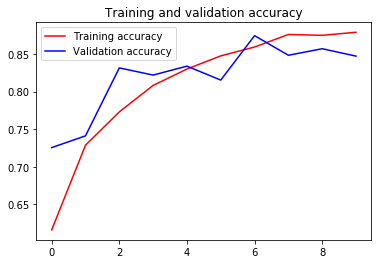

In [46]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)

In [0]:
model.save('my_model.h5')

In [48]:
ls

data/  gdrive/  __MACOSX/  my_model.h5  sample_data/


In [49]:
model

[[1. 0. 0.]]


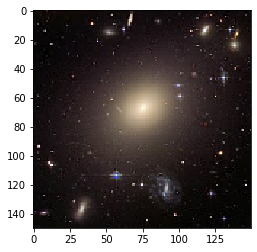

In [53]:
img = image.load_img(os.path.join('testing', 'other-elliptical.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[0. 1. 0.]]


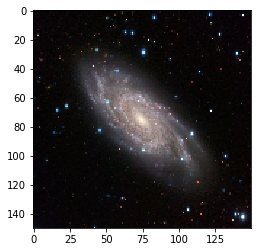

In [54]:
img = image.load_img(os.path.join('testing', 'other-spiral.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)

[[1. 0. 0.]]


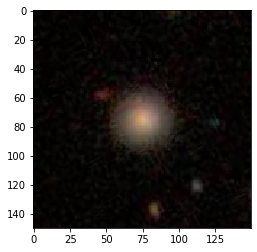

In [65]:
img = image.load_img(os.path.join('testing', 'elliptical-1.jpg') , target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
plt.imshow(img)
print(classes)